In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imports 

In [3]:
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
!pip install category_encoders
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.5 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = '/content/drive/MyDrive/Buku DM/dataset/car_evaluation.csv'

df = pd.read_csv(data, header=None)

# Renaming cols

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Removing unnecessary cols

In [7]:
X = df.drop(['class'], axis=1)

Y = df['class']

In [8]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [9]:
Y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

# Setting up Kfold and encoding categorical variables

In [12]:
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [13]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X = encoder.fit_transform(X)
#X_test = encoder.transform(X_test)

In [14]:
X = X.to_numpy()
Y = Y.to_numpy()

# Training and testing over the multiple splits created using Kfold

Split number: 1
Model accuracy score with criterion gini index: 0.7803
Training-set accuracy score: 0.7929
Training set score: 0.7929
Test set score: 0.7803
              precision    recall  f1-score   support

       unacc       0.55      0.55      0.55       355
         acc       0.00      0.00      0.00        63
       vgood       0.87      0.96      0.91      1079
        good       0.00      0.00      0.00        58

    accuracy                           0.79      1555
   macro avg       0.35      0.38      0.36      1555
weighted avg       0.73      0.79      0.76      1555

Split number: 2
Model accuracy score with criterion gini index: 0.7919
Training-set accuracy score: 0.7916
Training set score: 0.7916
Test set score: 0.7919
              precision    recall  f1-score   support

       unacc       0.54      0.53      0.54       354
         acc       0.00      0.00      0.00        61
       vgood       0.86      0.96      0.91      1081
        good       0.00      0.00 

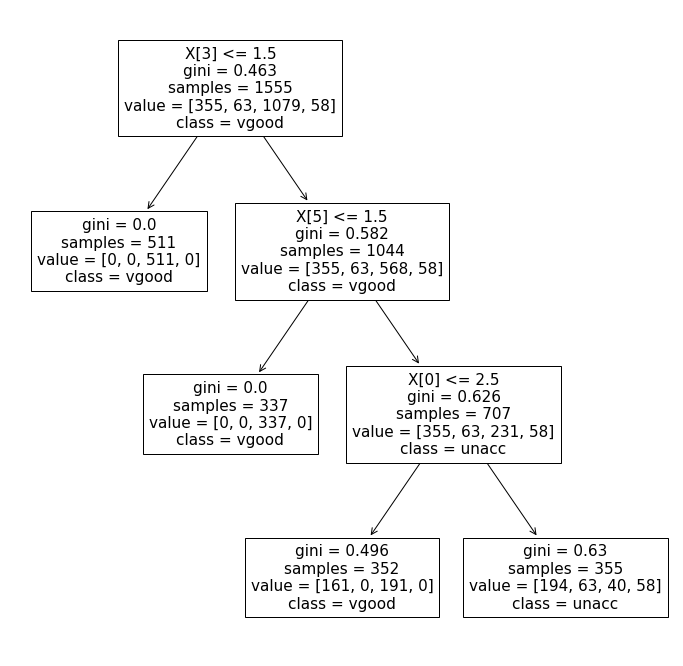

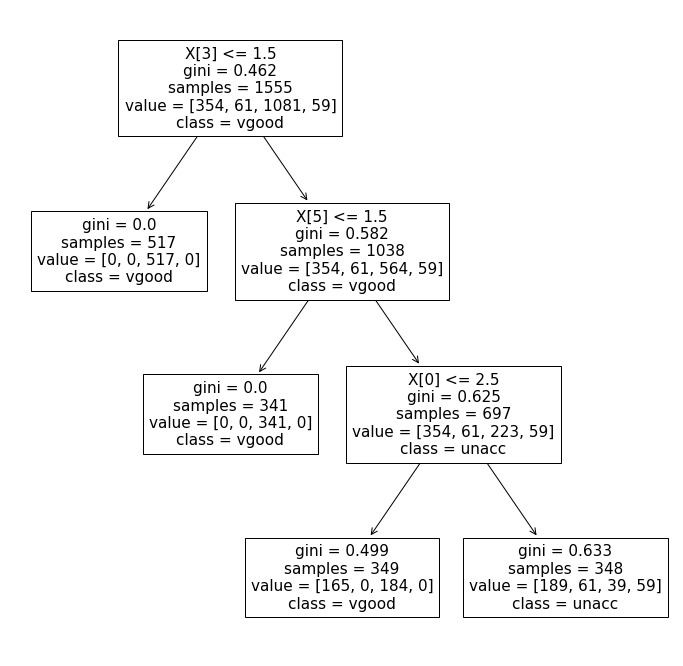

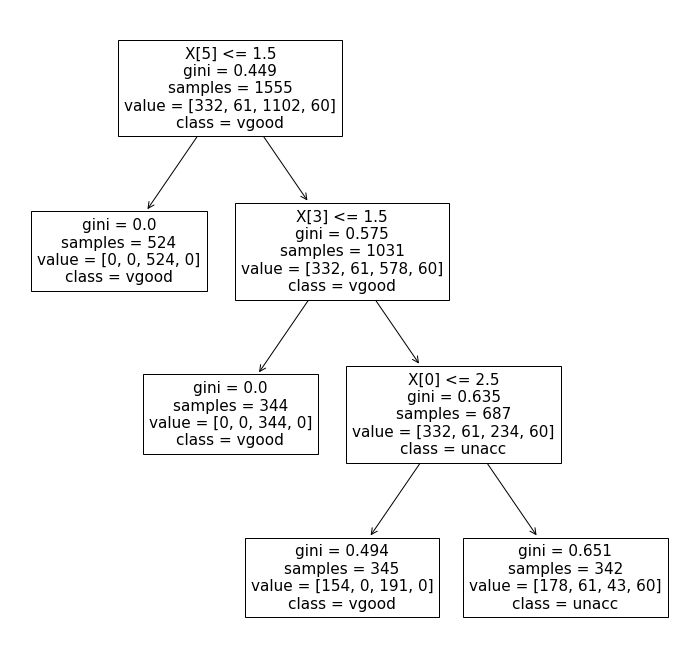

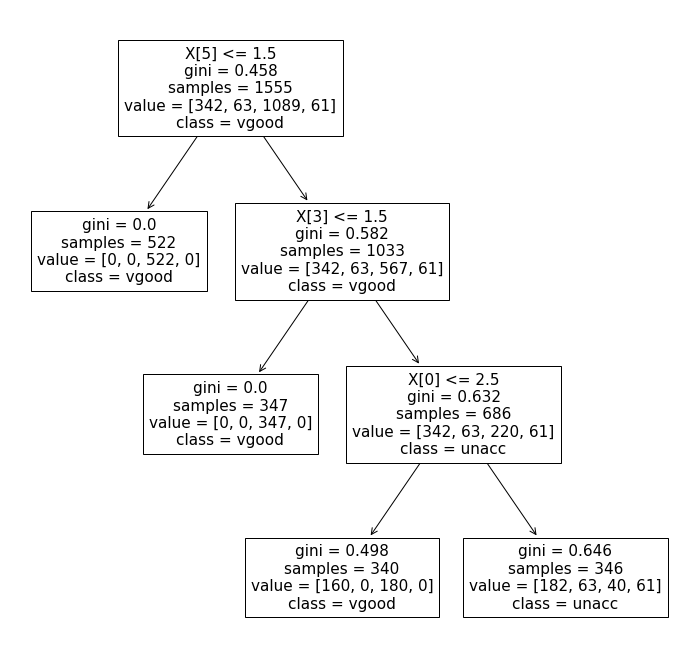

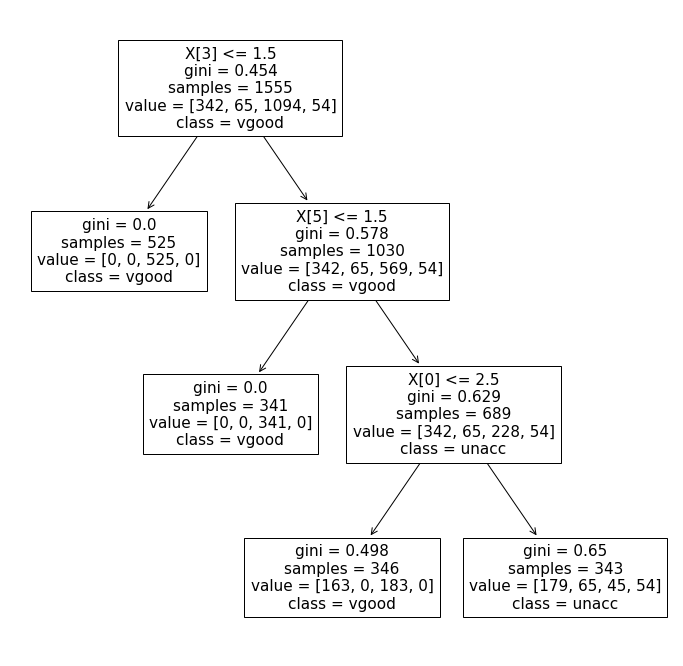

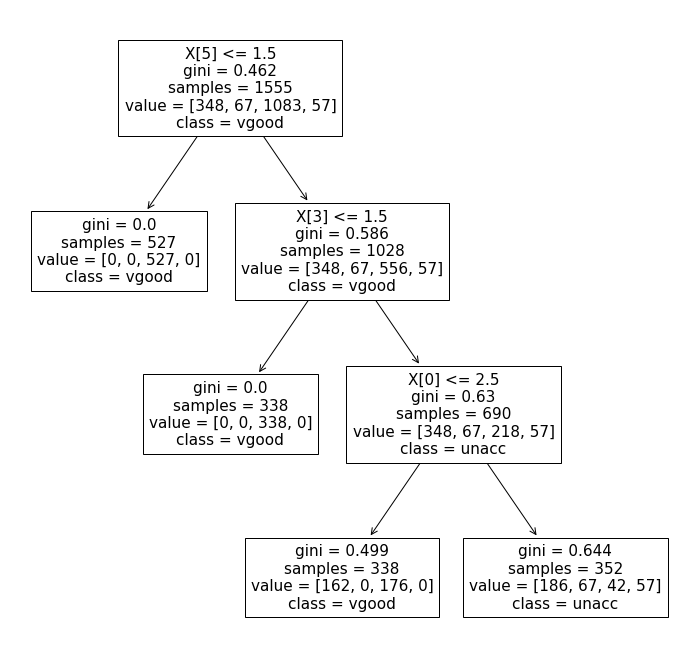

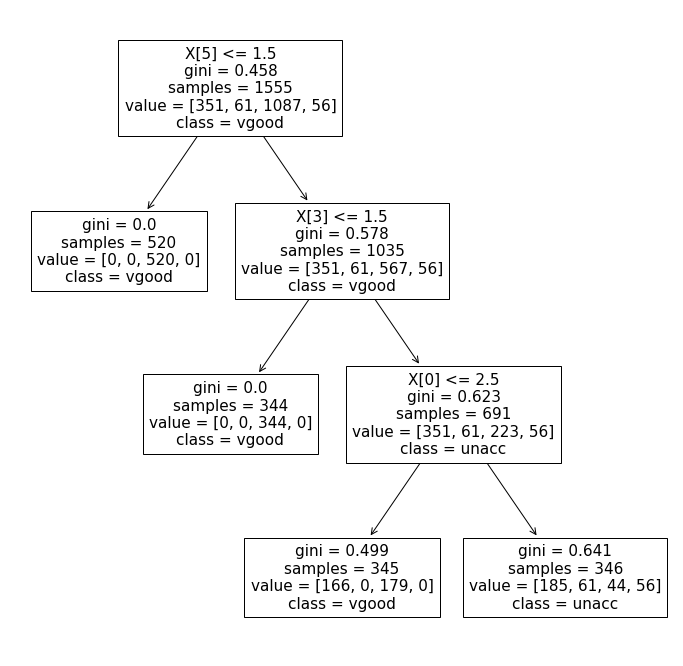

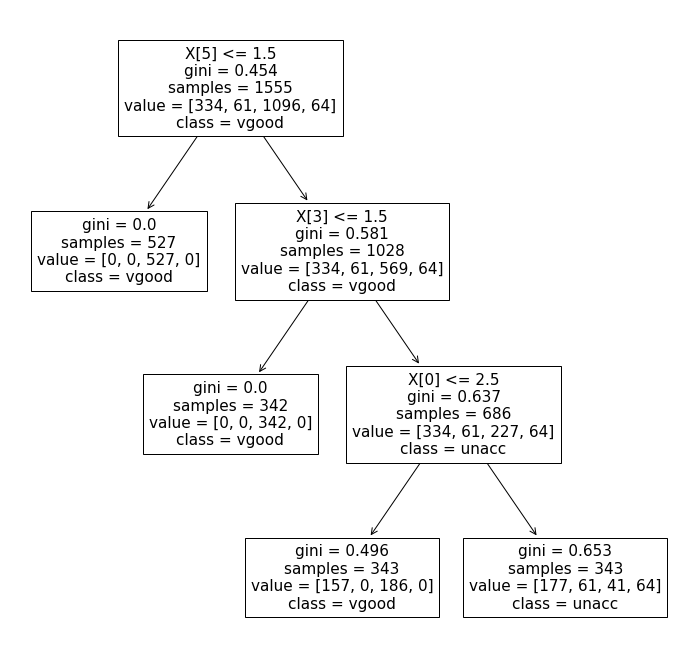

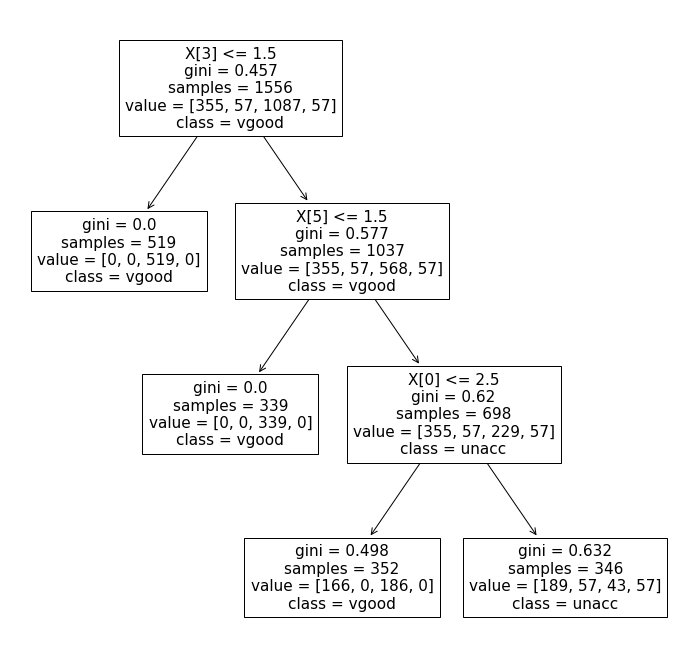

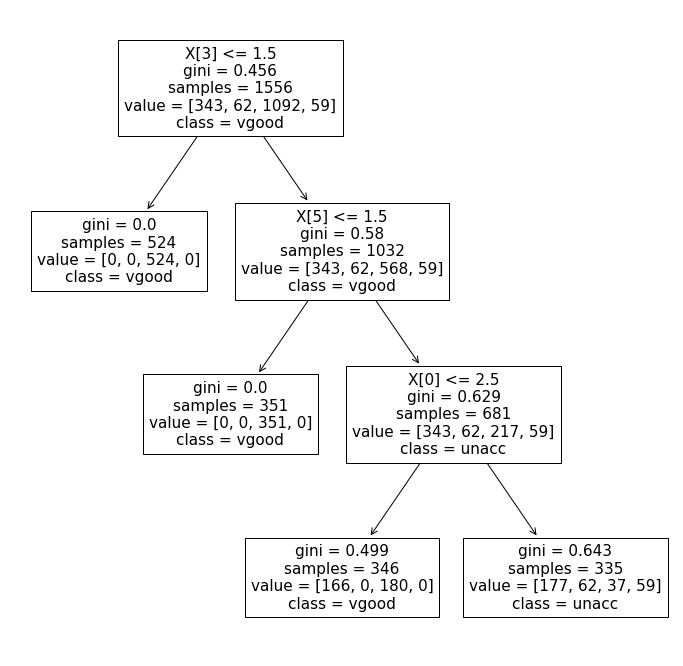

In [15]:
i=1
for train, test in kfold.split(X):
    
    X_train = X[train]
    X_test = X[test]
    Y_train = Y[train]
    Y_test = Y[test]
    
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

    clf_gini.fit(X_train, Y_train)
    y_pred_gini = clf_gini.predict(X_test)
    
    print('Split number: '+str(i))
    i=i+1
    print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))
    
    y_pred_train_gini = clf_gini.predict(X_train)
    y_pred_train_gini
    
    print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))
    
    print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))
    print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))
    
    plt.figure(figsize=(12,12))
    #col_names = ['unacc', 'acc']
    tree.plot_tree(clf_gini.fit(X_train, Y_train), class_names = list(df['class'].unique()))
    
    print(classification_report(Y_train, y_pred_train_gini, target_names = list(df['class'].unique())))